In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [107]:
# Import the data

# Define q and T
q = np.linspace(0.005, 4, num=800)
T = np.linspace(15, 70, num=12)

# Get s
s = []
fid = open("", "r")
datalines = fid.readlines()
for line in datalines:
    templine = line.split("\t")
    templine[-1] = templine[-1].strip()
    s.append(templine)  
fid.close()
s = np.asarray(s)
s = s.astype(np.float)

# Get ds, scattering minus scattering at 15 C
s15mat = np.array([s[:,0],]*len(T)).transpose()
ds = s - s15mat


Text(0.5, 0, 'q, 1/$\\AA$')

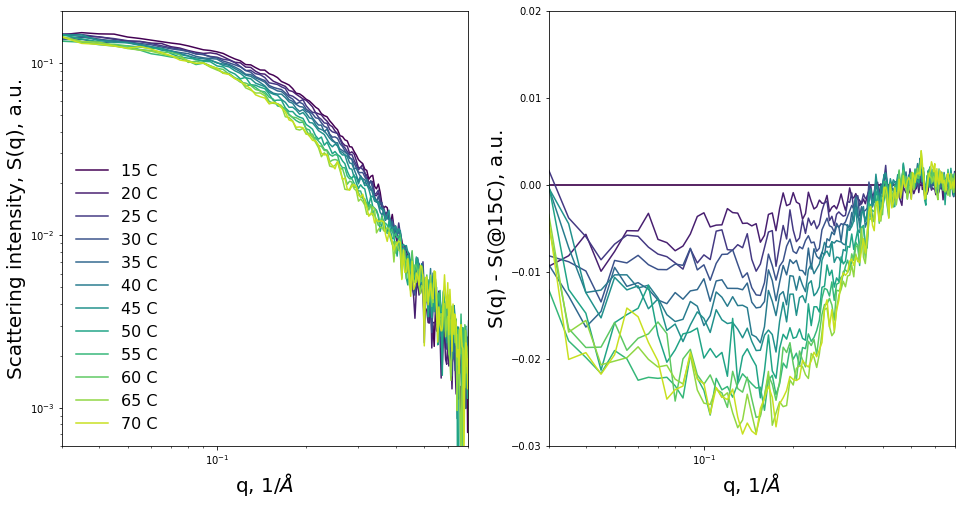

In [144]:
# Plot s and ds
cmap = matplotlib.cm.get_cmap('viridis')

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax2.plot(q, np.zeros(len(q)), c=[0.5, 0.5, 0.5])
for i in range(0,12):
    ax1.plot(q, s[:,i], c=cmap(i/len(T)))
    ax2.plot(q, ds[:,i], c=cmap(i/len(T)))
    
ax1.set_xlim(0.03, 0.7)
ax1.set_ylim(0.0006, 0.2)
ax1.set_xlabel("q, 1/$\AA$", fontsize=20)
ax1.set_ylabel("Scattering intensity, S(q), a.u.", fontsize=20)
ax1.set_xscale("log")
ax1.set_yscale("log")
handles = ["15 C", "20 C", "25 C", "30 C", "35 C", "40 C", "45 C", "50 C", "55 C", "60 C", "65 C", "70 C"]
ax1.legend(handles, frameon=False, loc='lower left', fontsize=16)

ax2.set_xlim(0.03, 0.7)
ax2.set_ylim(-0.03, 0.02)
ax2.set_xscale("log")
ax2.set_ylabel("S(q) - S(@15C), a.u.", fontsize=20)
ax2.set_xlabel("q, 1/$\AA$", fontsize=20)

Text(0.5, 0, 'Temperature, C')

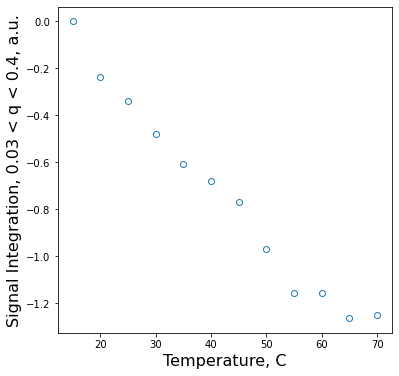

In [147]:
# area from difference scatttering
ds_sum = np.sum(ds[5:80, :], 0) # chose region where the difference is prominent

f2, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(T, ds_sum, linestyle='None', marker='o', markerfacecolor='None')
ax.set_ylabel("Signal Integration, 0.03 < q < 0.4, a.u.", fontsize=16)
ax.set_xlabel("Temperature, C", fontsize=16)


In [148]:
f1.savefig("static_saxs_tempscan.png")
f2.savefig("ds_signal_integration.png")